In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as rmse

In [2]:
recovery_2d_2 = pd.read_csv('_Recovery_data/IE_2d_recovery_2.csv', index_col=0)
recovery_3d_2 = pd.read_csv('_Recovery_data/IE_3d_recovery_2.csv', index_col=0)
recovery_4d_2 = pd.read_csv('_Recovery_data/IE_4d_recovery_2.csv', index_col=0)

recovery_2d_15 = pd.read_csv('_Recovery_data/IE_2d_recovery_15.csv', index_col=0)
recovery_3d_15 = pd.read_csv('_Recovery_data/IE_3d_recovery_15.csv', index_col=0)
recovery_4d_15 = pd.read_csv('_Recovery_data/IE_4d_recovery_15.csv', index_col=0)

recovery_2d_1 = pd.read_csv('_Recovery_data/IE_2d_recovery_1.csv', index_col=0)
recovery_3d_1 = pd.read_csv('_Recovery_data/IE_3d_recovery_1.csv', index_col=0)
recovery_4d_1 = pd.read_csv('_Recovery_data/IE_4d_recovery_1.csv', index_col=0)

recovery_2d_05 = pd.read_csv('_Recovery_data/IE_2d_recovery_05.csv', index_col=0)
recovery_3d_05 = pd.read_csv('_Recovery_data/IE_3d_recovery_05.csv', index_col=0)
recovery_4d_05 = pd.read_csv('_Recovery_data/IE_4d_recovery_05.csv', index_col=0)

recovery = {'2D': [recovery_2d_2, recovery_2d_15, recovery_2d_1, recovery_2d_05],
            '3D': [recovery_3d_2, recovery_3d_15, recovery_3d_1, recovery_3d_05],
            '4D': [recovery_4d_2, recovery_4d_15, recovery_4d_1, recovery_4d_05]}

mu_true = {'2D': [np.append([recovery['2D'][i]['mu1_true'], 
                             recovery['2D'][i]['mu2_true']], 0) for i in range(4)],
           '3D': [np.append([recovery['3D'][i]['mu1_true'], 
                             recovery['3D'][i]['mu2_true'], 
                             recovery['3D'][i]['mu3_true']], 0) for i in range(4)],
           '4D': [np.append([recovery['4D'][i]['mu1_true'], 
                             recovery['4D'][i]['mu2_true'], 
                             recovery['4D'][i]['mu3_true'],
                             recovery['4D'][i]['mu4_true']], 0) for i in range(4)]}

mu_estimate = {'2D': [np.append([recovery['2D'][i]['mu1_estimate'], 
                                 recovery['2D'][i]['mu2_estimate']], 0) for i in range(4)],
               '3D': [np.append([recovery['3D'][i]['mu1_estimate'], 
                                 recovery['3D'][i]['mu2_estimate'], 
                                 recovery['3D'][i]['mu3_estimate']], 0) for i in range(4)],
               '4D': [np.append([recovery['4D'][i]['mu1_estimate'], 
                                 recovery['4D'][i]['mu2_estimate'], 
                                 recovery['4D'][i]['mu3_estimate'],
                                 recovery['4D'][i]['mu4_estimate']], 0) for i in range(4)]}


color = {'2D': '#ffd166',
         '3D': '#ef476f',
         '4D': '#26547c'}

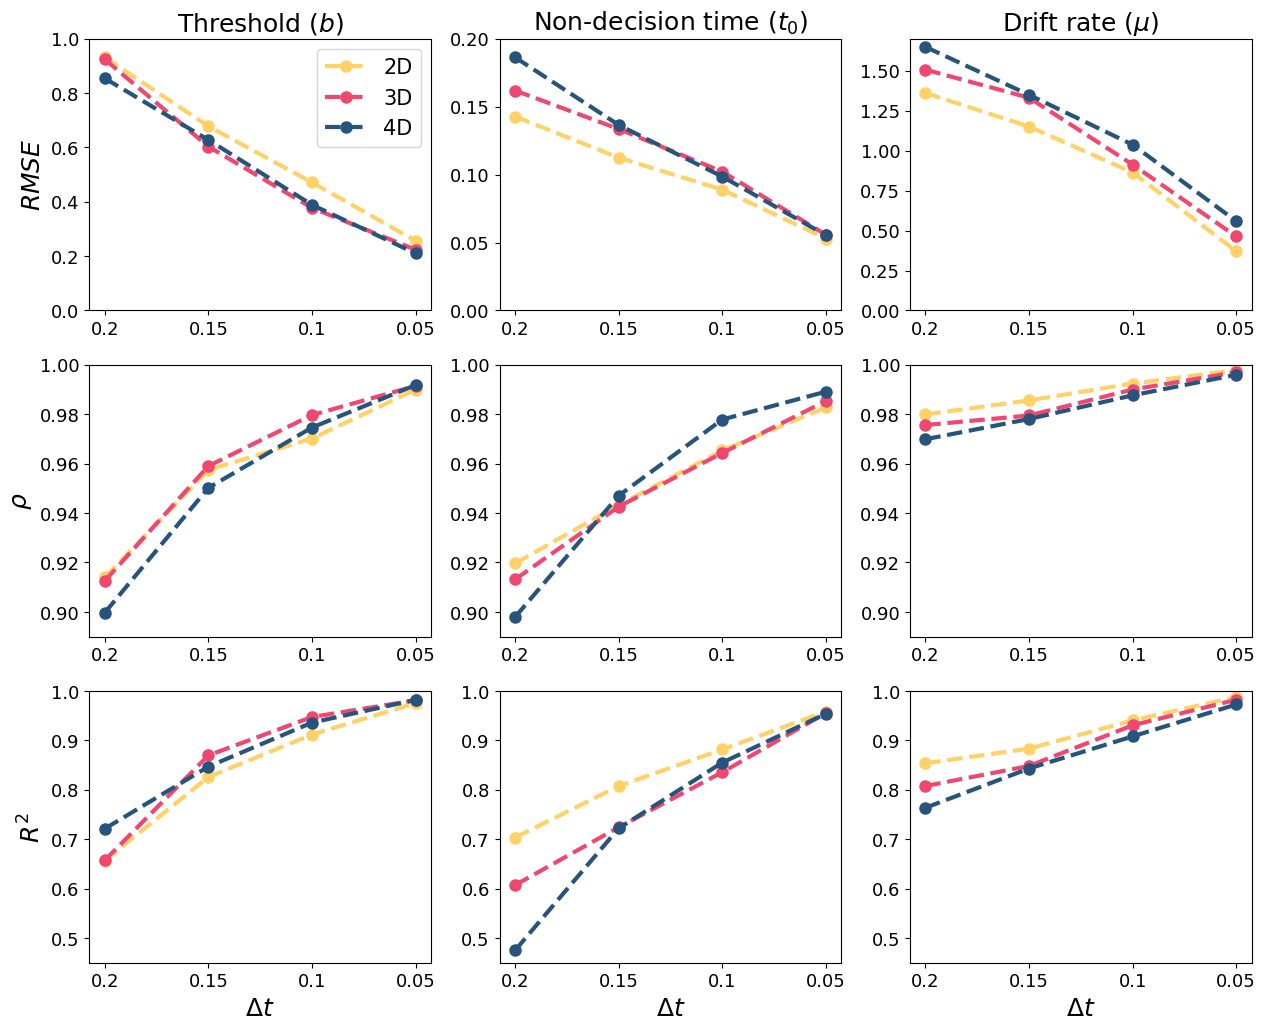

In [3]:
delta_t = [0.05, 0.1, 0.15, 0.2]

plt.figure(figsize=(15, 12))

# plt.rc('font', size=10)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize

plt.subplot(331)
plt.ylim([0, 1])
prms = 'threshold'
for dim in ['2D', '3D', '4D']:
    plt.plot(delta_t, 
             [rmse(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)]) for i in range(4)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.title('Threshold ($b$)')
plt.ylabel(r'$RMSE$')
plt.xticks([0.05, 0.1, 0.15, 0.2], [0.2, 0.15, 0.1, 0.05])

plt.legend();

plt.subplot(332)
plt.ylim([0, 0.2])
prms = 'ndt'
for dim in ['2D', '3D', '4D']:
    plt.plot(delta_t, 
             [rmse(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)]) for i in range(4)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.title('Non-decision time ($t_0$)')
plt.xticks([0.05, 0.1, 0.15, 0.2], [0.2, 0.15, 0.1, 0.05])


plt.subplot(333)
plt.ylim([0, 1.7])
for dim in ['2D', '3D', '4D']:
    plt.plot(delta_t, 
             [rmse(mu_true[dim][i],mu_estimate[dim][i]) for i in range(4)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.title('Drift rate ($\mu$)')
plt.xticks([0.05, 0.1, 0.15, 0.2], [0.2, 0.15, 0.1, 0.05])


# ############################## Correlation #########################
plt.subplot(334)
plt.ylim([0.89, 1])
prms = 'threshold'
for dim in ['2D', '3D', '4D']:
    plt.plot(delta_t, 
             [pearsonr(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)])[0] for i in range(4)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.ylabel(r'$\rho$')
plt.xticks([0.05, 0.1, 0.15, 0.2], [0.2, 0.15, 0.1, 0.05])


plt.subplot(335)
plt.ylim([0.89, 1])
prms = 'ndt'
for dim in ['2D', '3D', '4D']:
    plt.plot(delta_t, 
             [pearsonr(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)])[0] for i in range(4)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.xticks([0.05, 0.1, 0.15, 0.2], [0.2, 0.15, 0.1, 0.05])

plt.subplot(336)
plt.ylim([0.89, 1])
for dim in ['2D', '3D', '4D']:
    plt.plot(delta_t, 
             [pearsonr(mu_true[dim][i],mu_estimate[dim][i])[0] for i in range(4)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.xticks([0.05, 0.1, 0.15, 0.2], [0.2, 0.15, 0.1, 0.05])

# ##############################      R2     #########################
plt.subplot(337)
plt.ylim([0.45, 1])
prms = 'threshold'
for dim in ['2D', '3D', '4D']:
    plt.plot(delta_t, 
             [r2_score(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)]) for i in range(4)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.ylabel(r'$R^2$')
plt.xlabel(r'$\Delta t$')
plt.xticks([0.05, 0.1, 0.15, 0.2], [0.2, 0.15, 0.1, 0.05])

plt.subplot(338)
plt.ylim([0.45, 1])
prms = 'ndt'
for dim in ['2D', '3D', '4D']:
    plt.plot(delta_t, 
             [r2_score(recovery[dim][i]['{}_true'.format(prms)],
                   recovery[dim][i]['{}_estimate'.format(prms)]) for i in range(4)],
             '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.xlabel(r'$\Delta t$')
plt.xticks([0.05, 0.1, 0.15, 0.2], [0.2, 0.15, 0.1, 0.05])

plt.subplot(339)
plt.ylim([0.45, 1])
for dim in ['2D', '3D', '4D']:
    plt.plot(delta_t, 
             [r2_score(mu_true[dim][i],mu_estimate[dim][i]) for i in range(4)],
              '--', marker='o', markersize=8, linewidth=3, c=color[dim], label=dim);
plt.xlabel(r'$\Delta t$');
plt.xticks([0.05, 0.1, 0.15, 0.2], [0.2, 0.15, 0.1, 0.05]);

plt.savefig('../../../_01_Figures/ie_conv.pdf', 
            transparent=True, 
            dpi=600, 
            bbox_inches='tight');